# Real Hardware - Noise Model

We make use of a real hardware noise model to construct the following distributions using our Galton Board architecture:

- Simple Binomial/Gaussian
- Exponential
- Hadamard Walk (i.e. Binomial with p=0.5)

Note that the recent updates to Qiskit brought about changes in the qiskit.providers.fake_provider module, such that the individual noise model classes like FakeBrisbane are now only accessible using Qiskit Runtime and an account with an API key. IBM has, however made a GenericBackendV2 class available, which, when given a number of qubits, returns a generic BackendV2 implementation with backend properties randomly sampled from real historical IBM backends. This achieves our goal of using a real-hardware derived noise model, even if we can't directly trace which specific backend it is based on.

The construction of this fake backend will slow runtime of the noise-enabled examples.

We shall follow this procedure:

- use the noise model to produce a simple version of each distribution
- compute distance metrics for each example
- for each example, perform a repeated computation to account for stochastic noise.

In [1]:
import os
os.chdir("..")
print(os.getcwd())

/home/ismail/quantum_python/quantum_nnl_project


In [2]:
from src.noise_optimisation import *
from src.exponential_box import *
from utils.plot_utils import *
from utils.distance_metrics_utils import *

If errors are incurred at any stage, it is worth restarting the Jupyter kernel and then running from the beginning.

## Step 1: Showing differences in results for a perfect vs noise model simulation, standard Gaussian

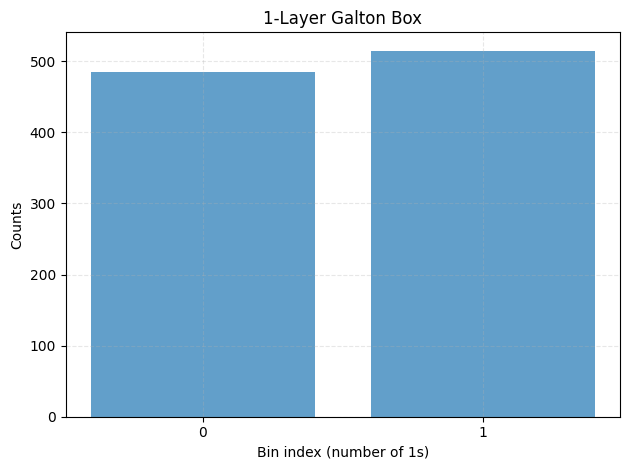

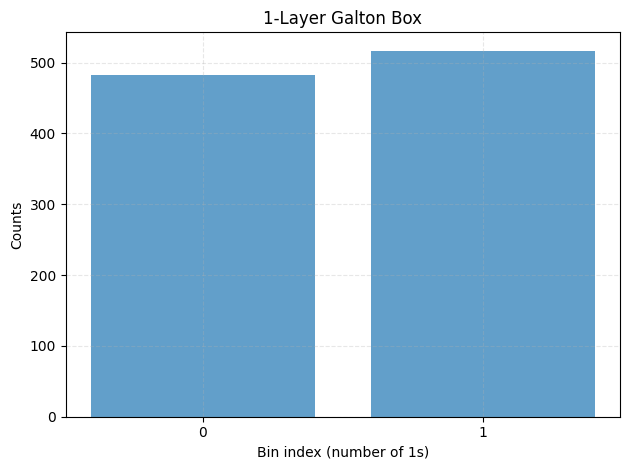

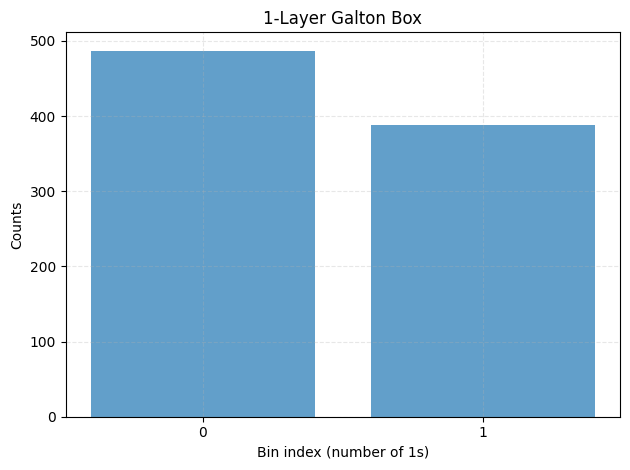

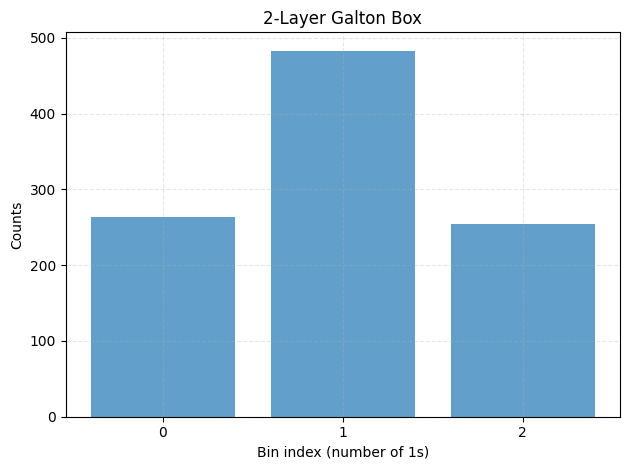

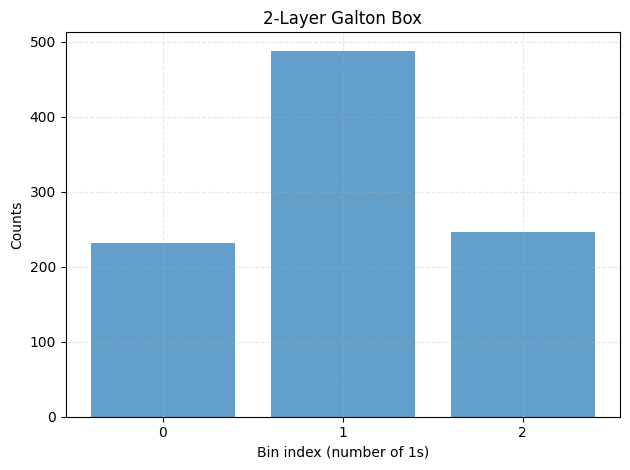

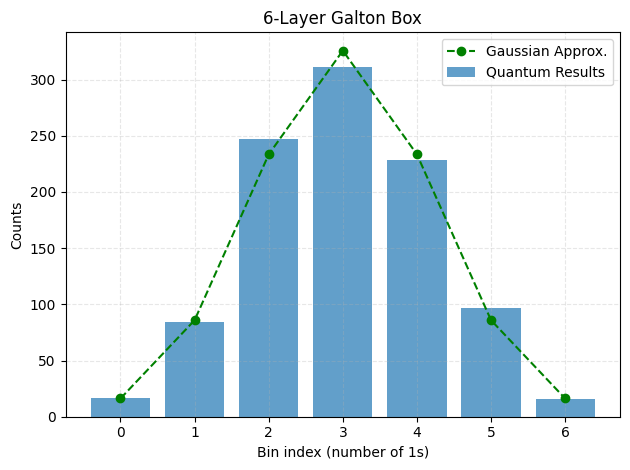

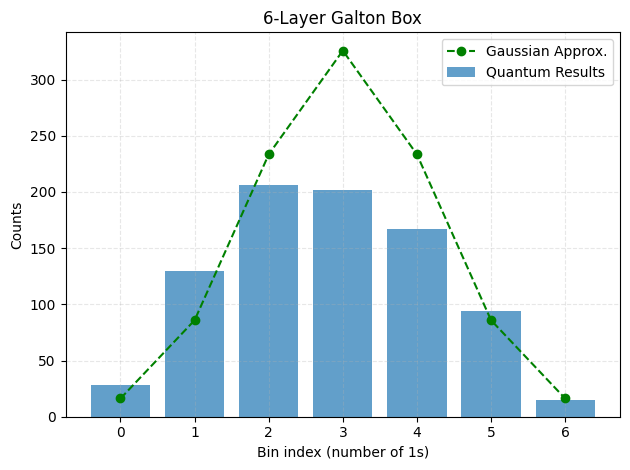

In [3]:
# 1-layer

counts = galton_one_layer() # standard simulation
plot_bins(counts, n=1, shots=1000)

counts = galton_one_layer(noise=True) # with noise model
plot_bins(counts, n=1, shots=1000)

counts = galton_one_layer(noise=True, zne=True) # with ZNE correction noise model
plot_bins(counts, n=1, shots=1000)

# 2-layer

counts = galton_two_layer() # standard simulation
plot_bins(counts, n=2, shots=1000)

counts = galton_two_layer(noise=True) # with noise model
plot_bins(counts, n=2, shots=1000)
# n-layer (test with n=6)

counts = galton_n_layer(n=6) # standard simulation
plot_bins(counts, n=6, shots=1000, overlay="gaussian")

counts = galton_n_layer(n=6, noise=True) # with noise model
plot_bins(counts, n=6, shots=1000, overlay="gaussian")

## Step 2: Showing differences in results for a perfect vs noise model simulation, exponential

STANDARD SIMULATION:


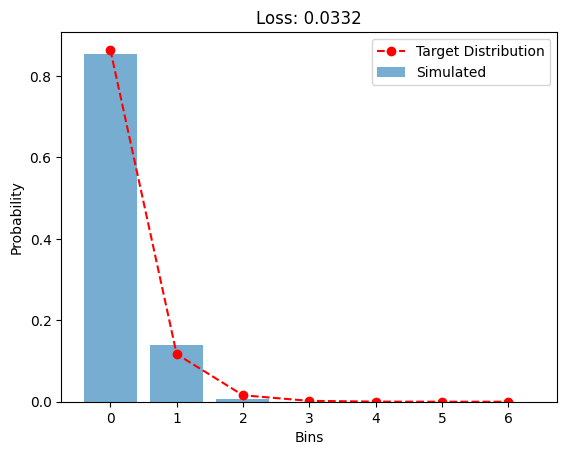

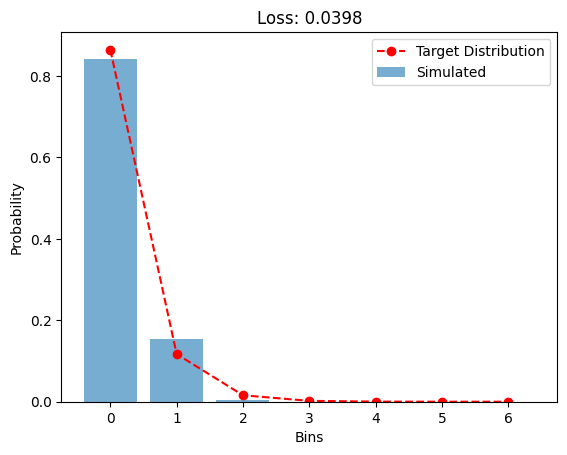

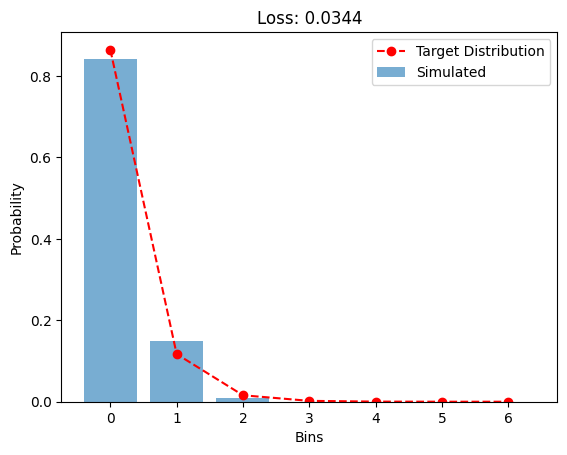

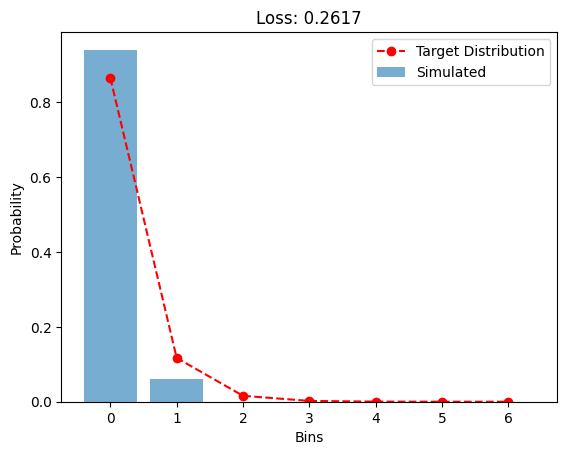

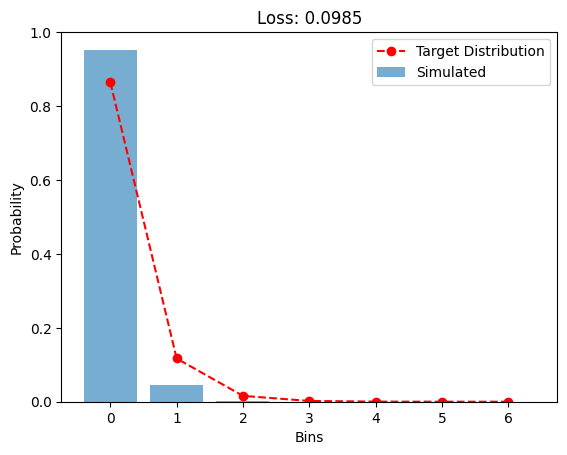

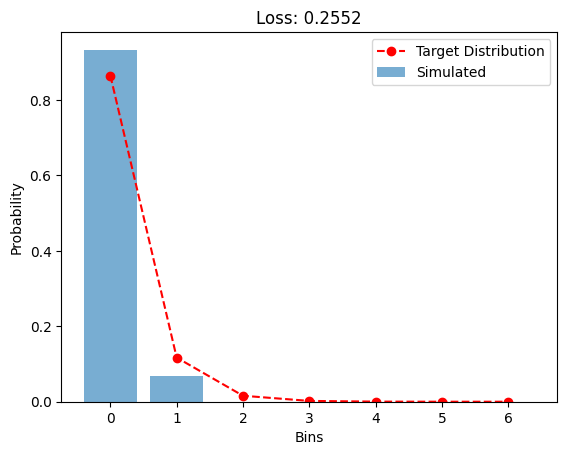

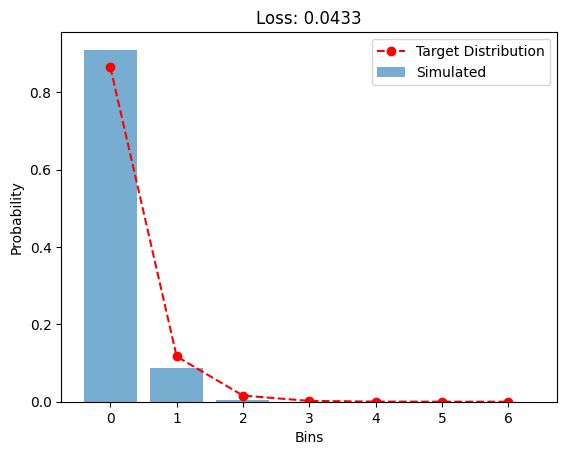

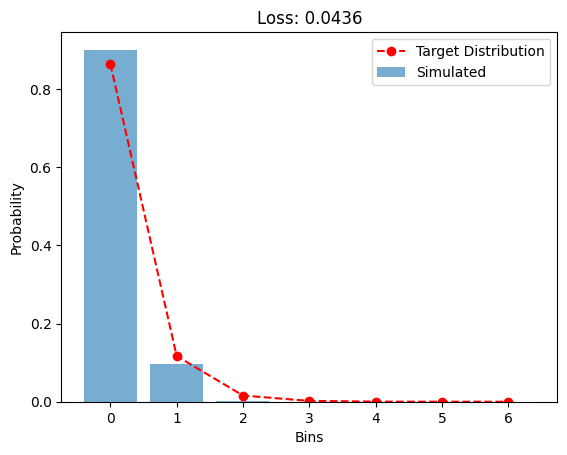

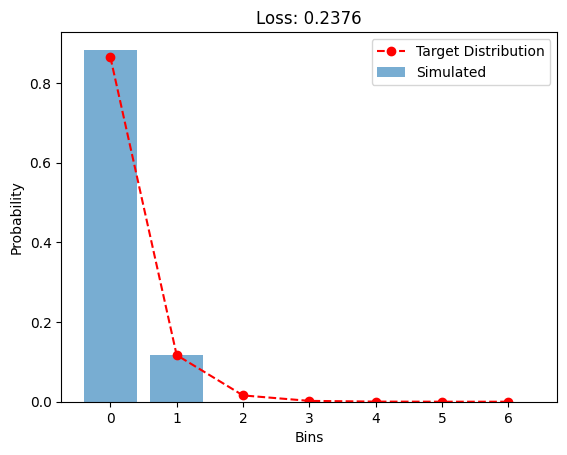

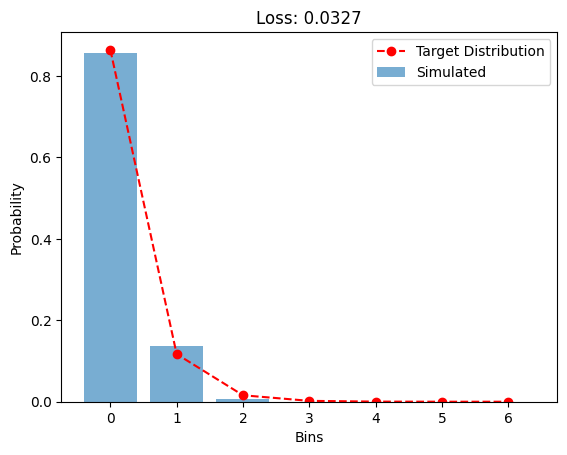

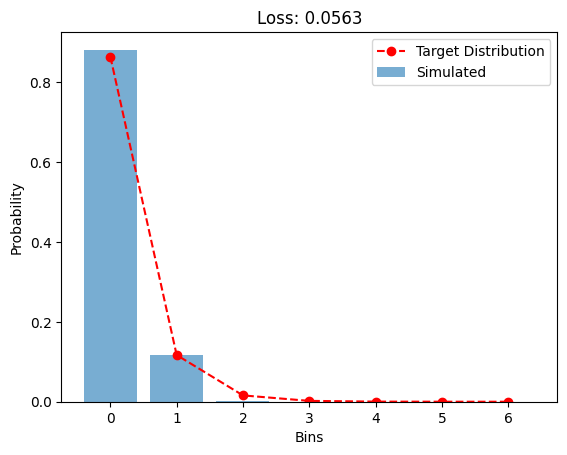

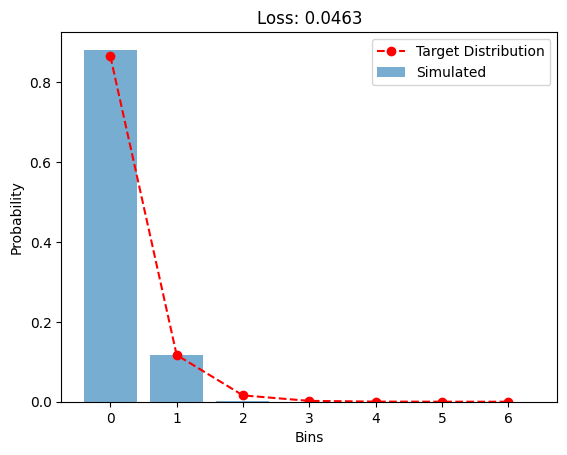

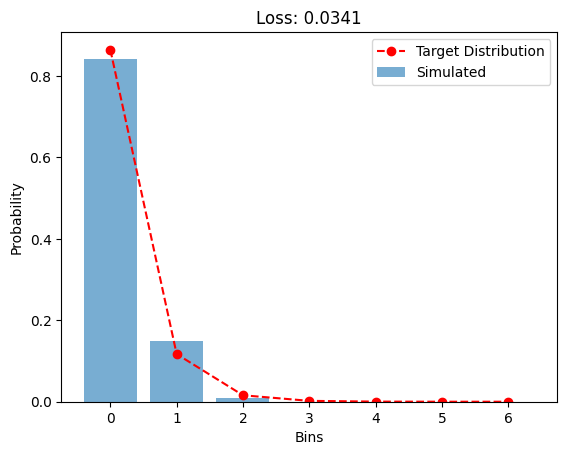

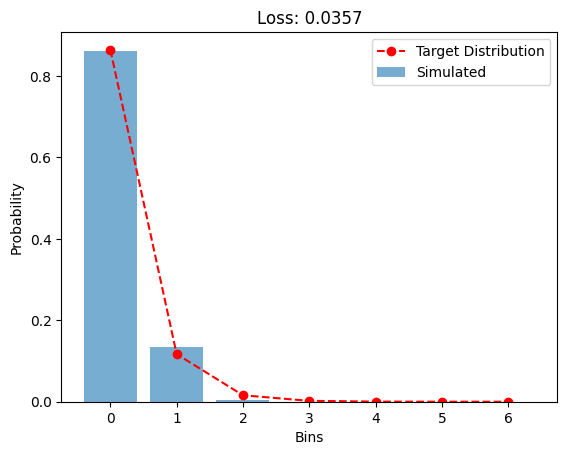

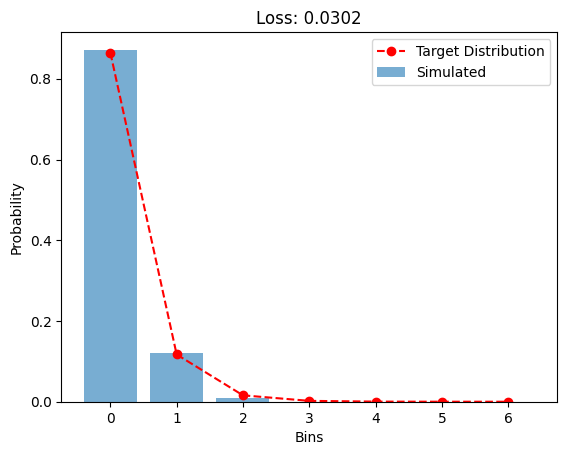

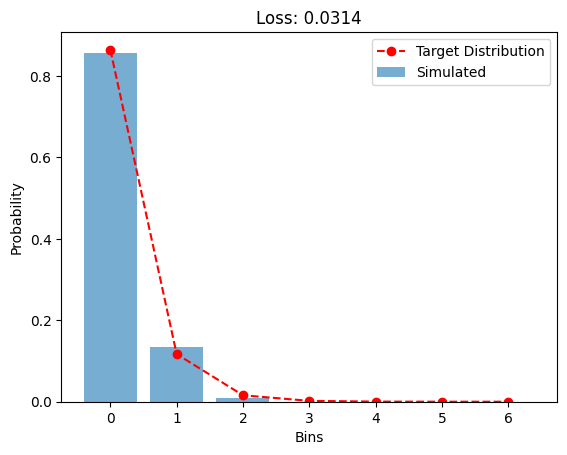

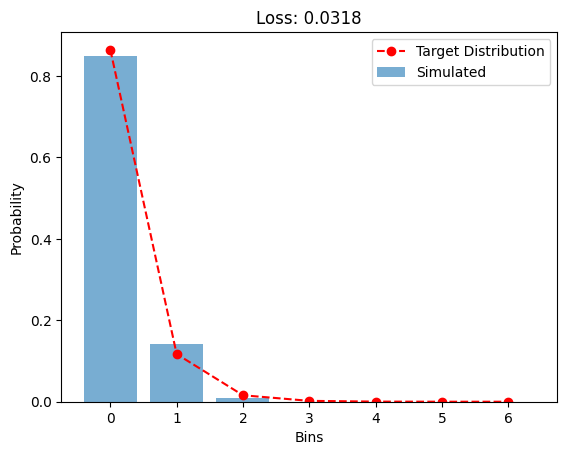

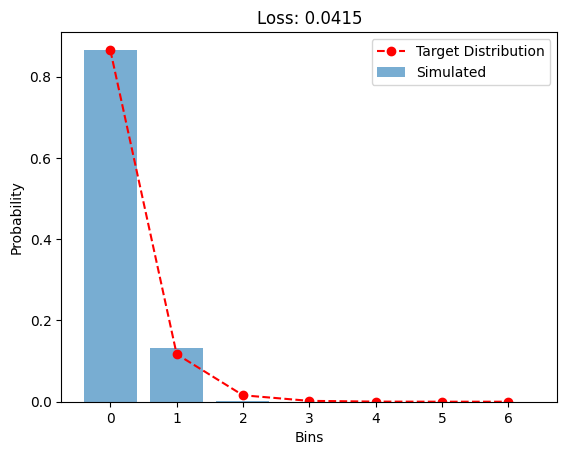

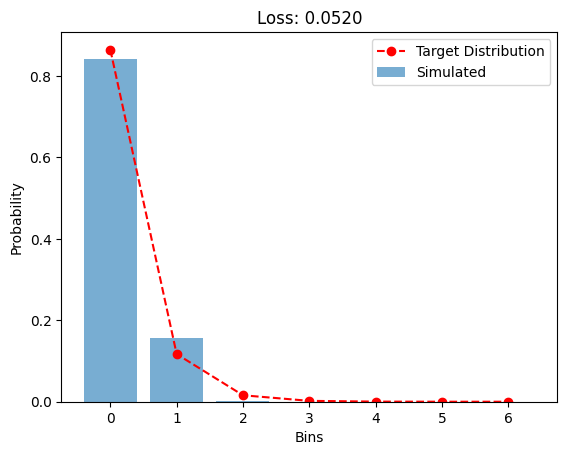


Time limit reached. Forcing optimization to stop.

Optimization stopped due to time limit.

Optimizer exit (last step): N/A
Best tracked [initial, decay]: [0.6237409  2.00000001]
Best Optimized thetas: [0.6237408984629742, 0.3783179795802934, 0.22946145430963957, 0.1391754076089845, 0.0844141520038874, 0.05119977143199976]
Best Loss: 0.03021663647266282


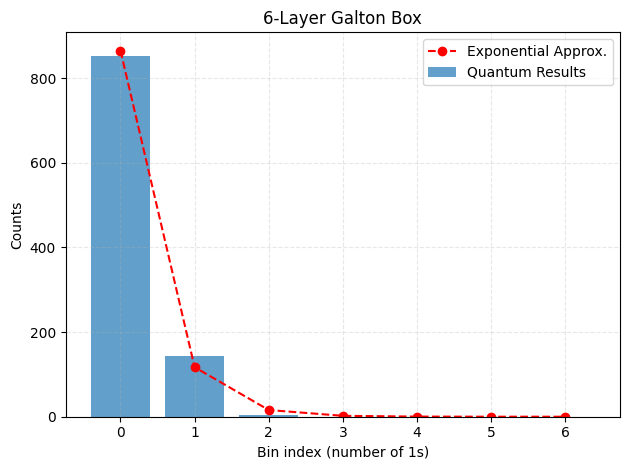

SIMULATED OPTIMISER WITH NOISE MODEL FINAL RESULT:


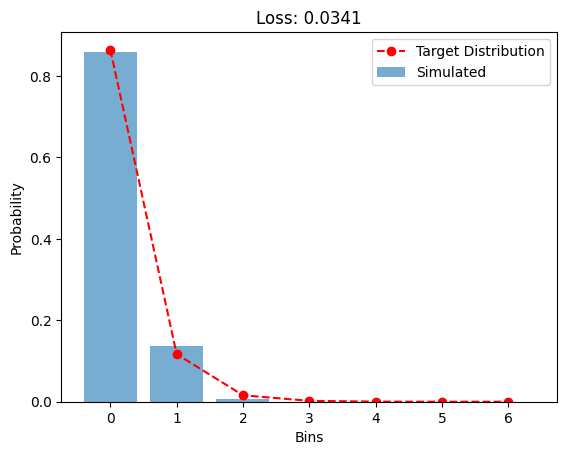

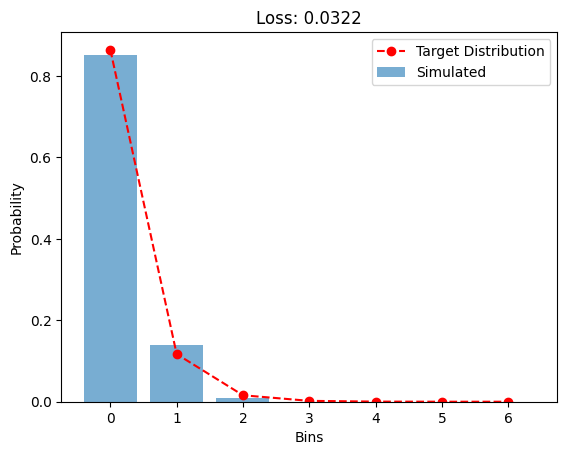

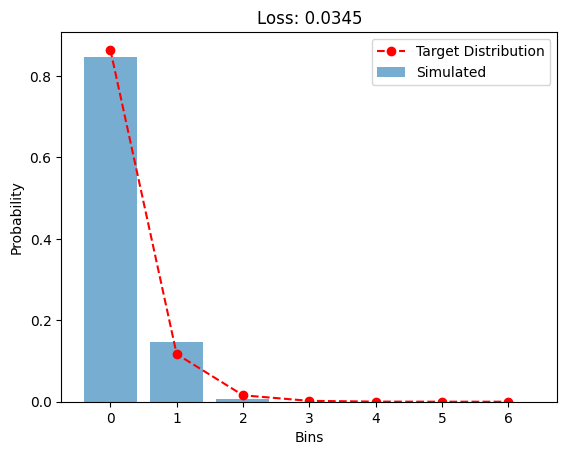

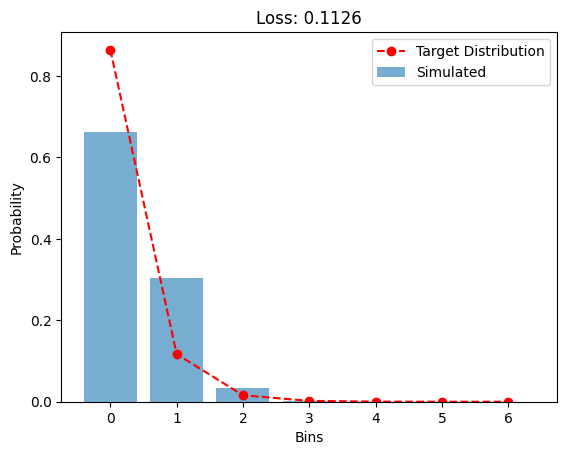

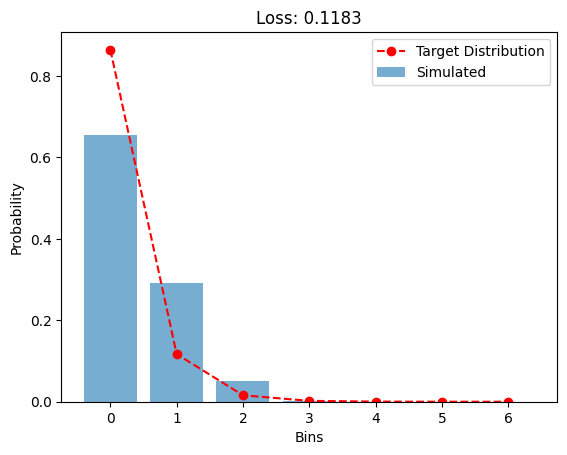

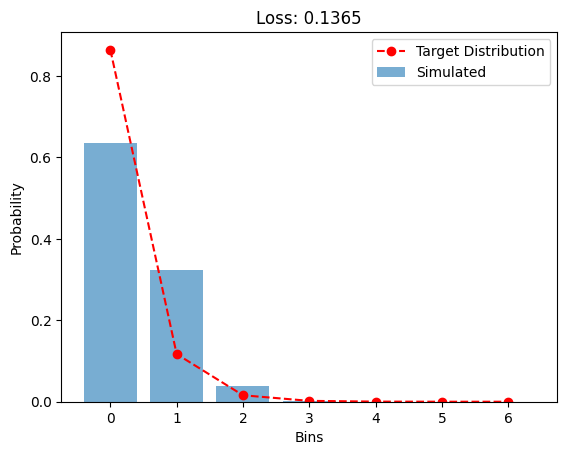

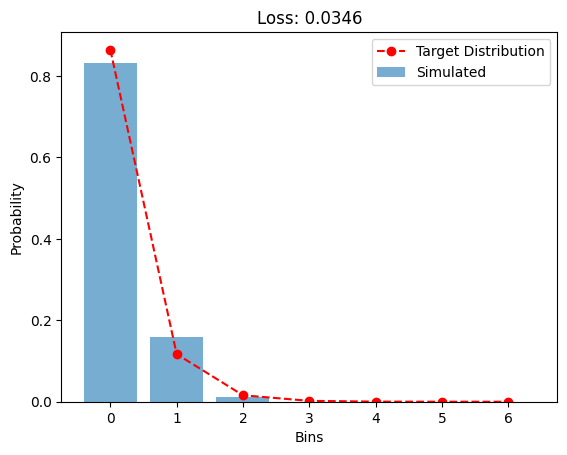

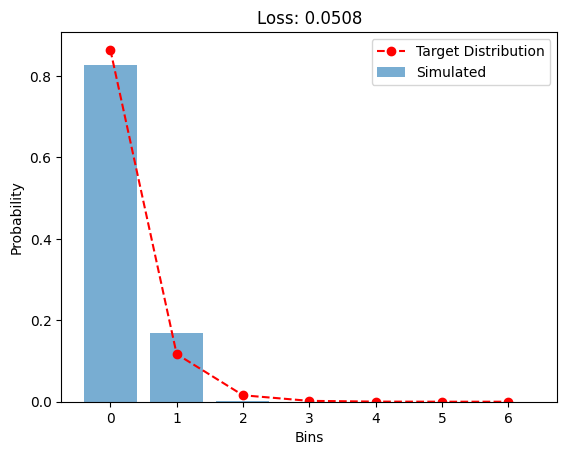

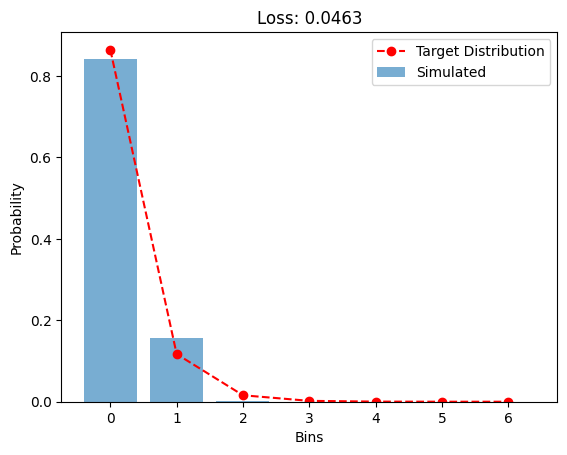

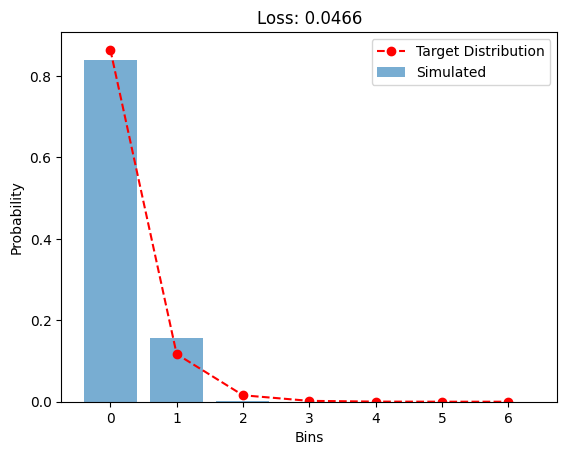

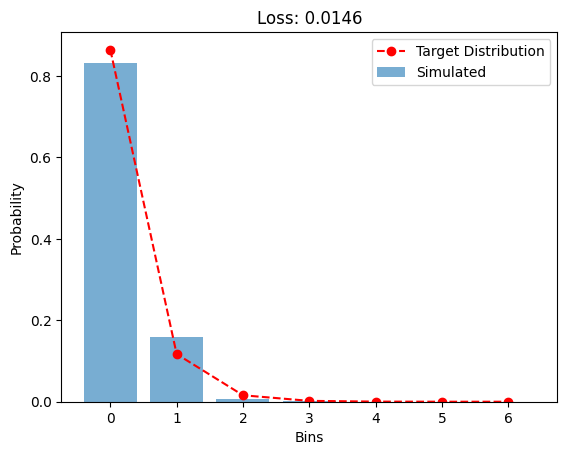

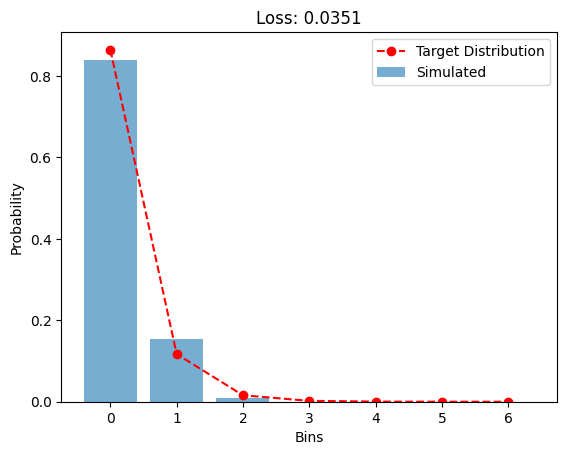

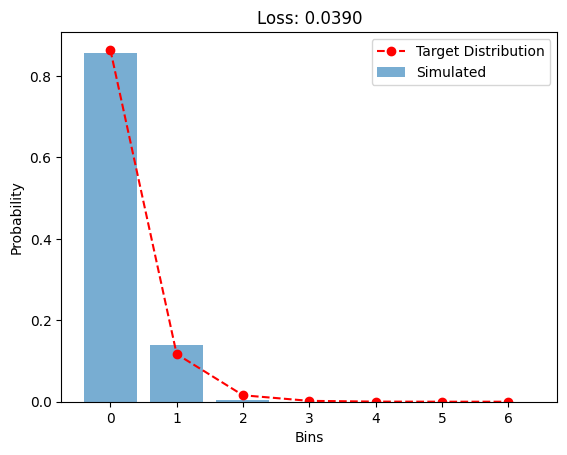

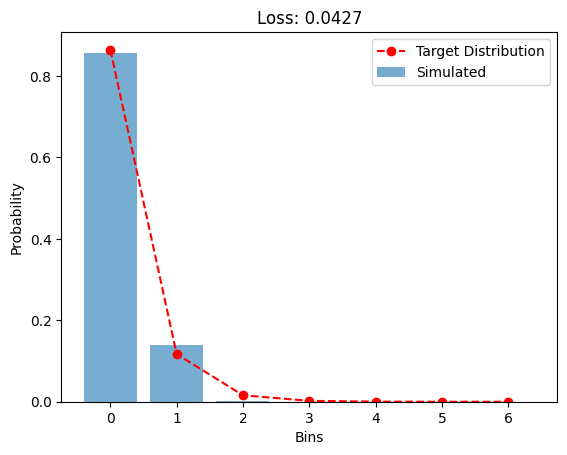

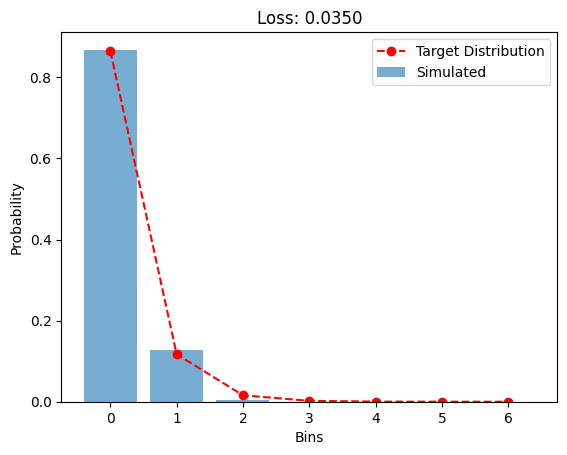

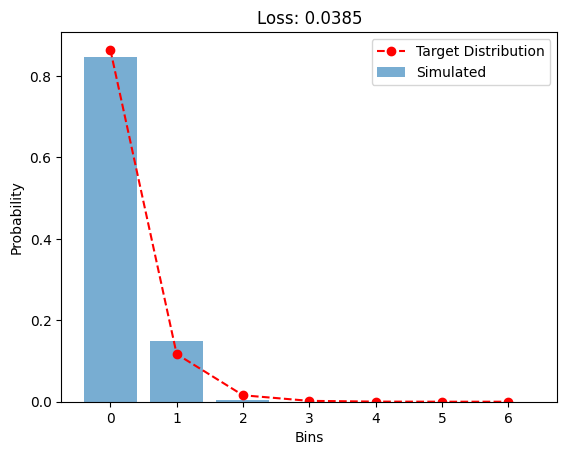

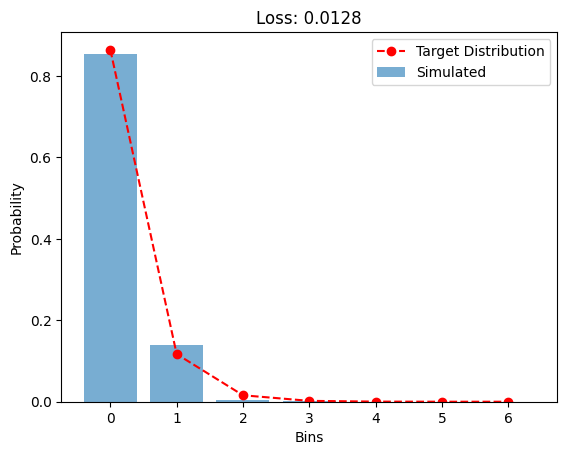

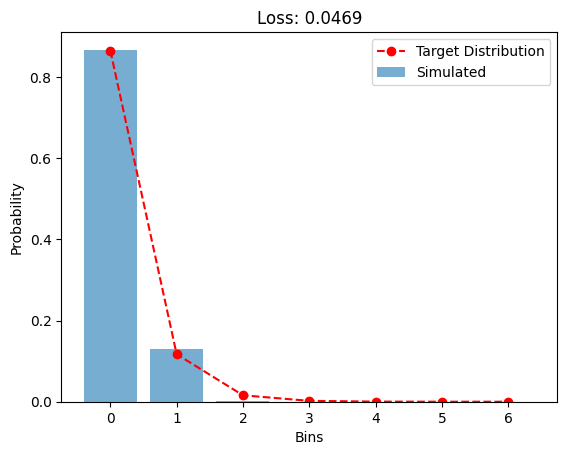

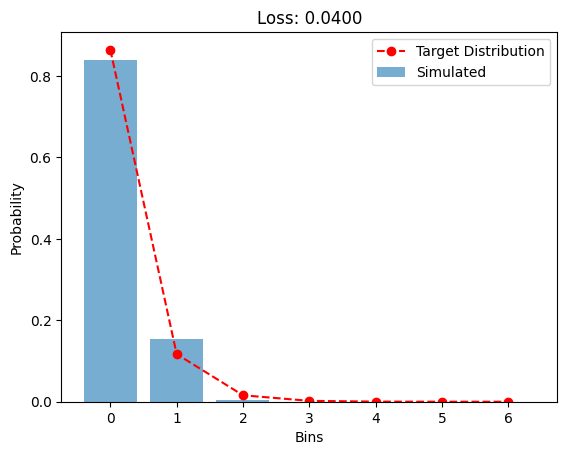


Time limit reached. Forcing optimization to stop.

Optimization stopped due to time limit.

Optimizer exit (last step): N/A
Best tracked [initial, decay]: [0.62872643 2.        ]
Best Optimized thetas: [0.6287264341821985, 0.38134185890330047, 0.2312955292566608, 0.14028782994862518, 0.08508887004839337, 0.051609008484654564]
Best Loss: 0.012808127597844547


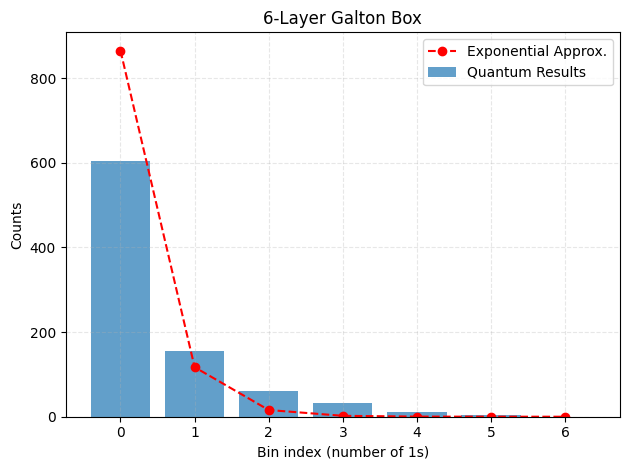

In [4]:
print("STANDARD SIMULATION:")
res = optimise_layerwise(n=6, target="exponential", scale=0.5, shots=1000) # we aim for beta = 0.5 (or lambda = 2)
counts = biased_galton_n_layer(n=6, shots=1000, thetas=res[0])
plot_bins(counts, n=6, shots=1000, overlay="exponential", scale=0.5)

print("SIMULATED OPTIMISER WITH NOISE MODEL FINAL RESULT:")
res = optimise_layerwise(n=6, target="exponential", scale=0.5, shots=1000) # we aim for beta = 0.5 (or lambda = 2)
counts = biased_galton_n_layer(n=6, shots=1000, thetas=res[0], noise=True)
plot_bins(counts, n=6, shots=1000, overlay="exponential", scale=0.5)

## Step 3: Computing Distance Metrics for a Gaussian, Exponential and Laplace Example

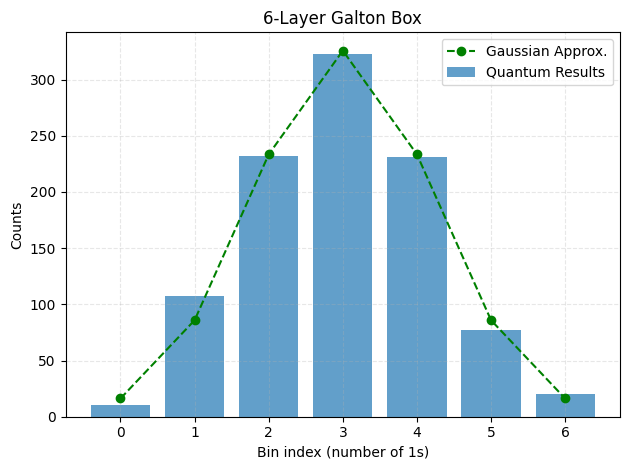

{0: 10, 1: 107, 2: 232, 3: 323, 4: 231, 5: 77, 6: 20}
0.05100000000000005


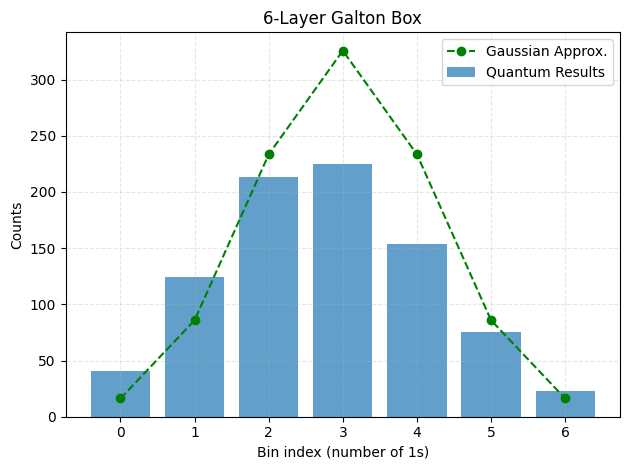

{0: 41, 1: 124, 2: 213, 3: 225, 4: 154, 5: 75, 6: 23}
0.27982456140350875


In [5]:
# Gaussian Example: Compare distance metrics between standard and noise model simulation
#(test with n=6)
counts = galton_n_layer(n=6) # standard simulation
plot_bins(counts, n=6, shots=1000, overlay="gaussian")
print(counts)
print(distribution_distance(counts, target_distribution="binomial", metric="w1", p=0.5))

counts = galton_n_layer(n=6, noise=True) # with noise model
plot_bins(counts, n=6, shots=1000, overlay="gaussian")
print(counts)
print(distribution_distance(counts, target_distribution="binomial", metric="w1", p=0.5))

STANDARD SIMULATION:


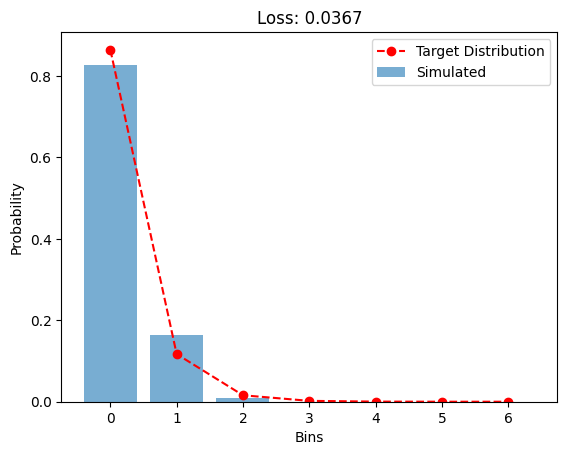

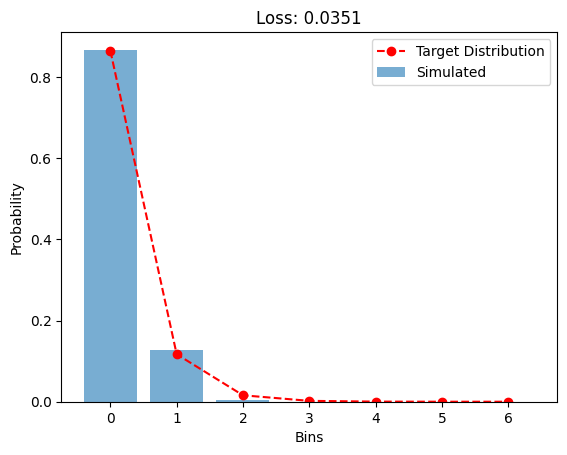

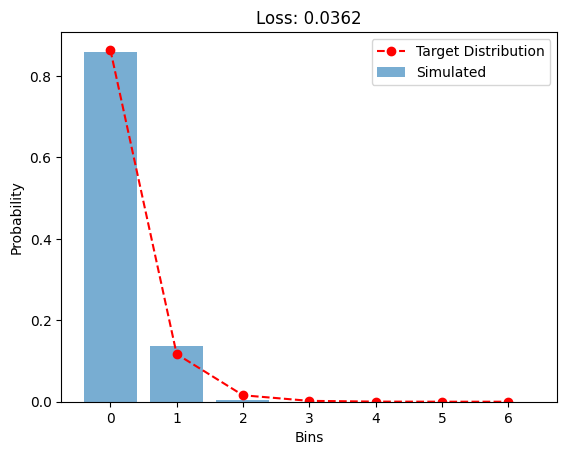

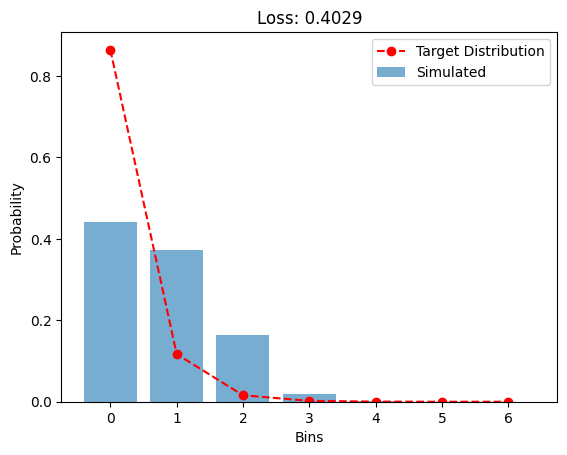

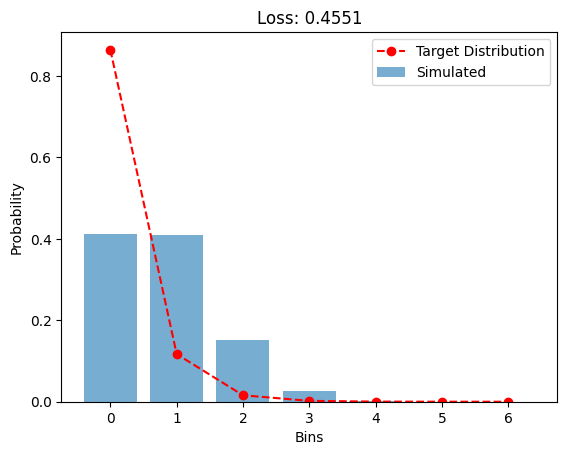

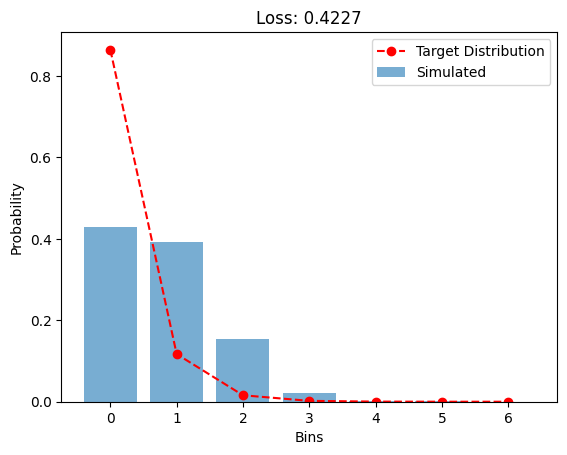

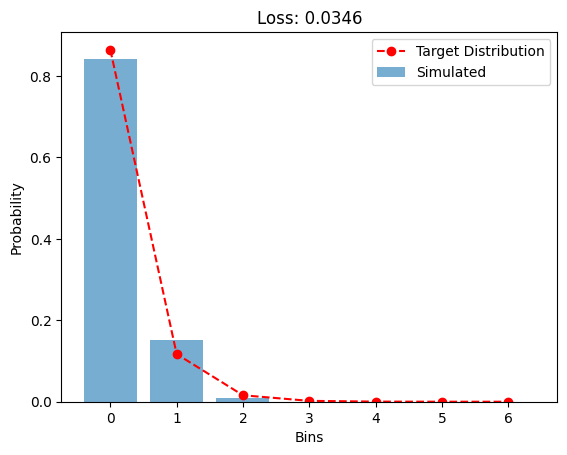

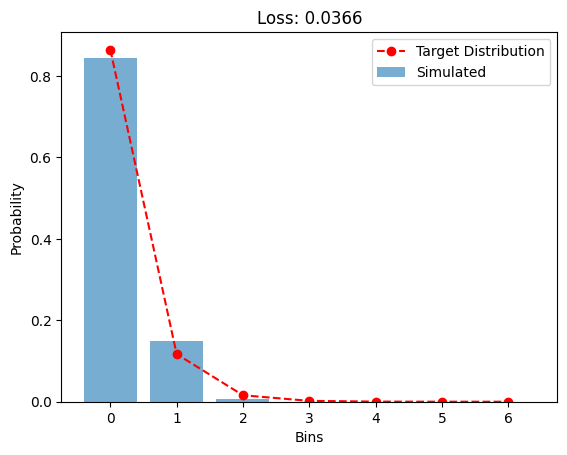

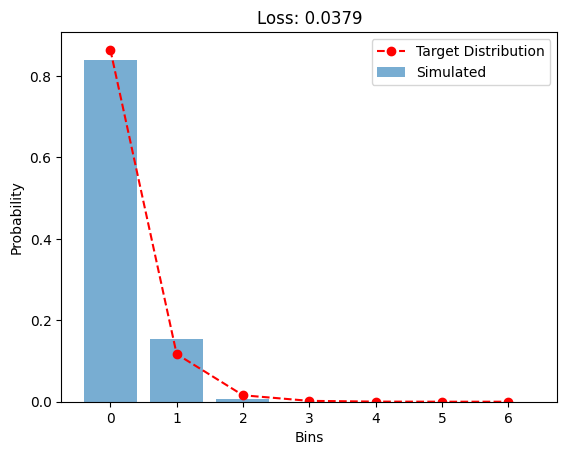

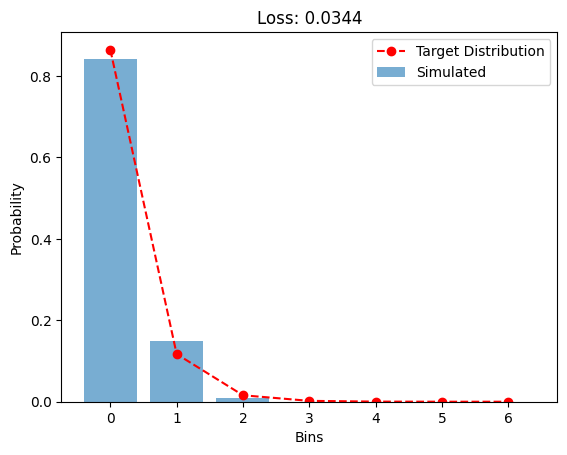

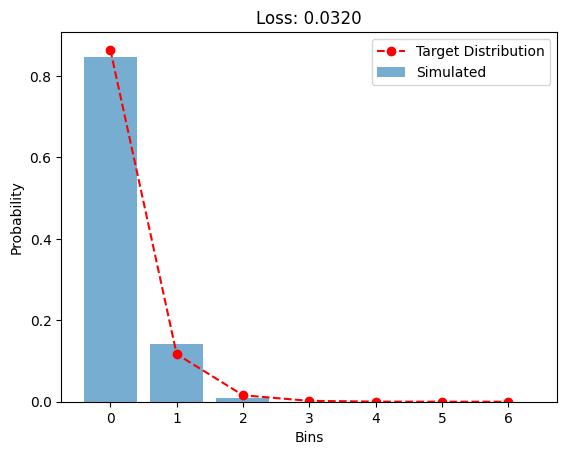

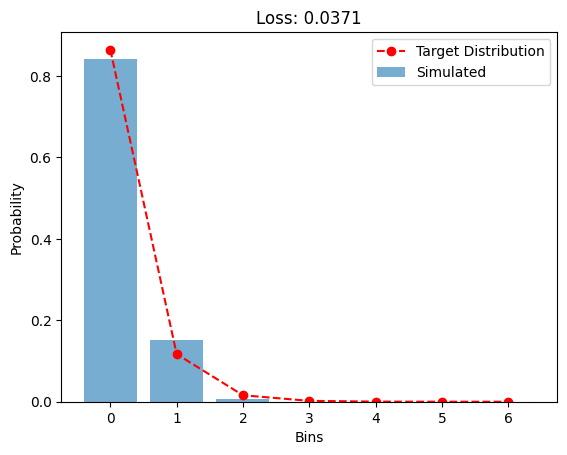

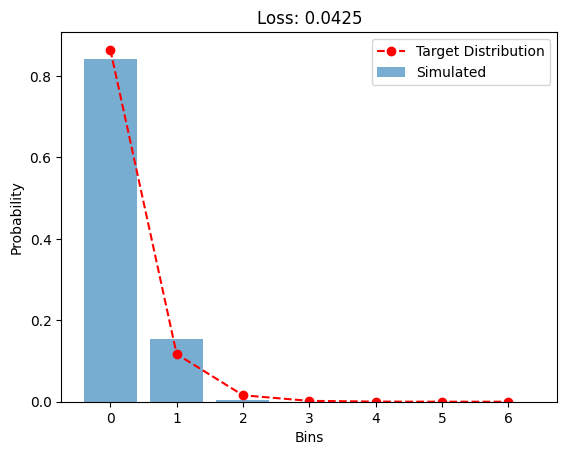

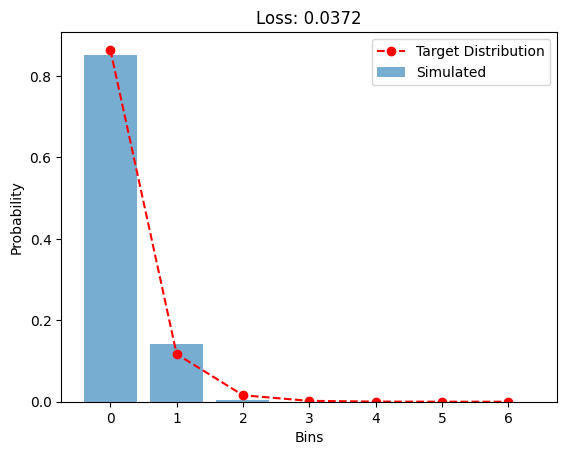

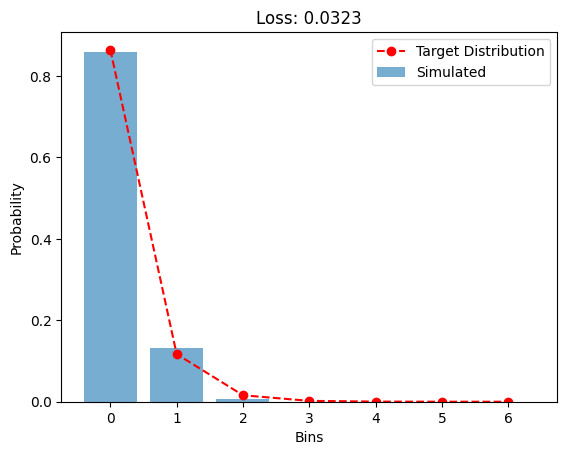

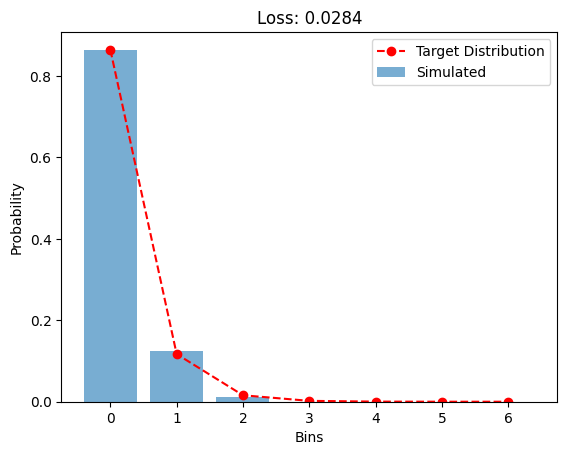

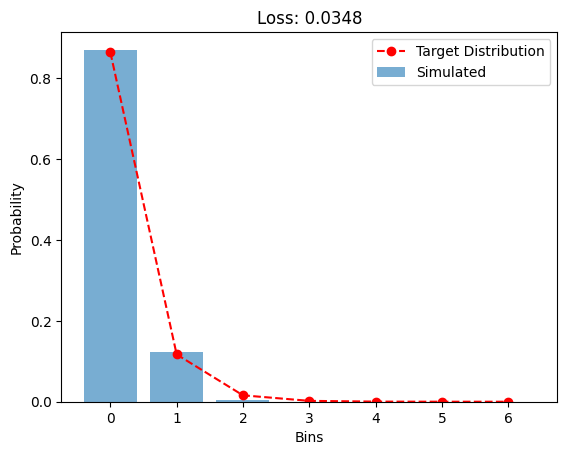

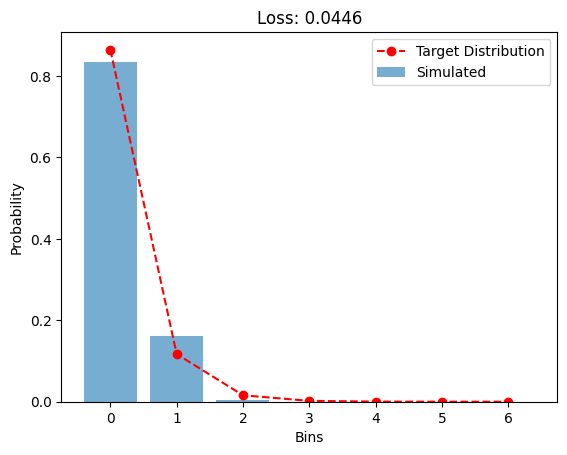


Time limit reached. Forcing optimization to stop.

Optimization stopped due to time limit.

Optimizer exit (last step): N/A
Best tracked [initial, decay]: [0.62836774 2.00046987]
Best Optimized thetas: [0.628367735722804, 0.3811690594246763, 0.23121787387057235, 0.1402572005133921, 0.08508028365863109, 0.051609861318613476]
Best Loss: 0.02836566616342649


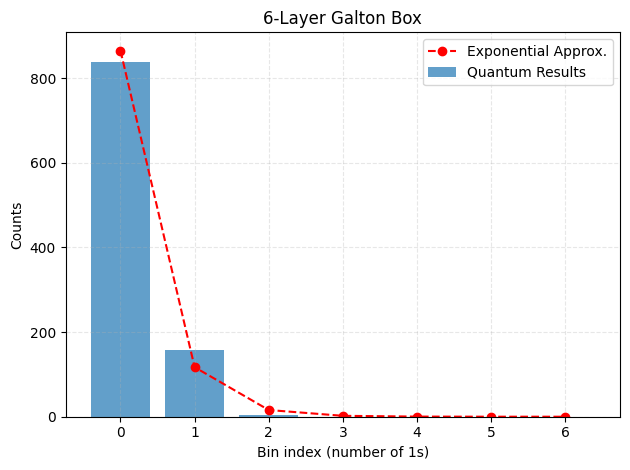

{0: 838, 1: 157, 2: 5, 3: 0, 4: 0, 5: 0, 6: 0}
0.06250863500717632
SIMULATED OPTIMISER WITH NOISE MODEL FINAL RESULT:


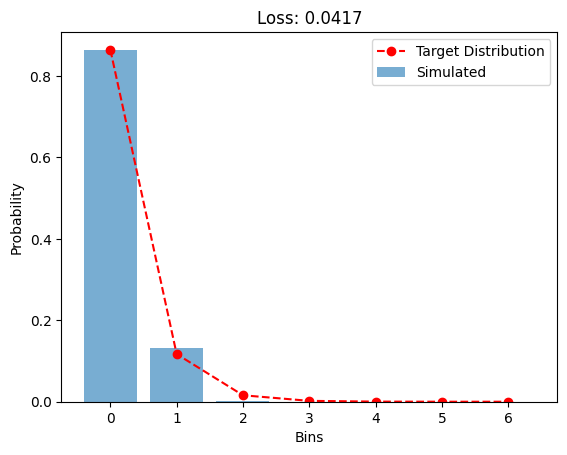

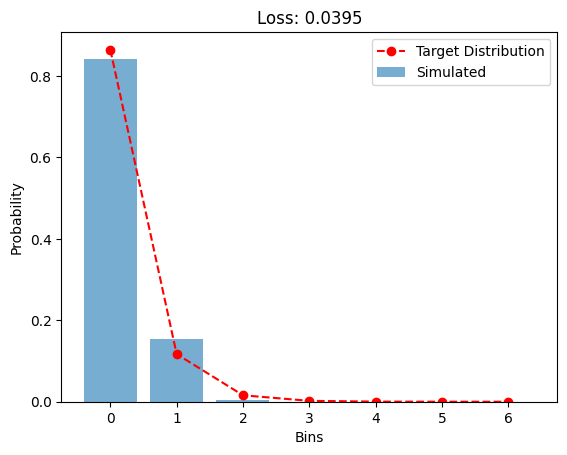

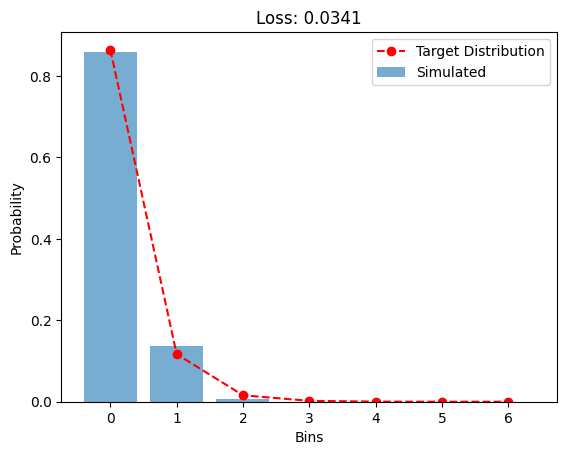

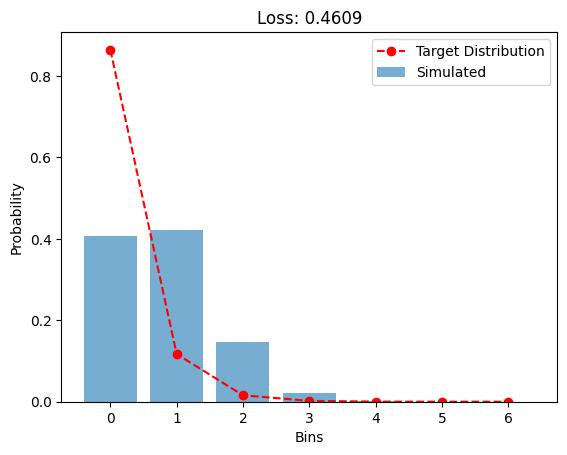

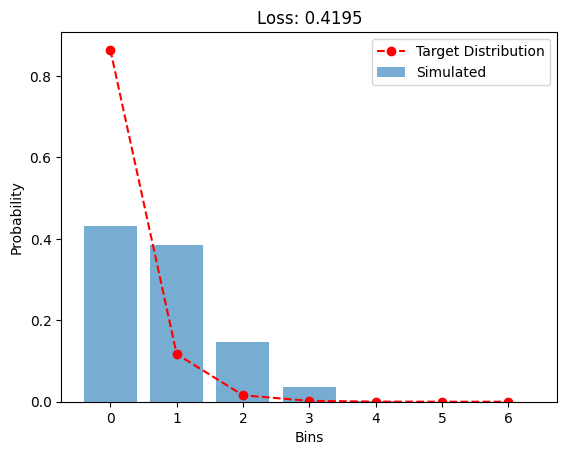

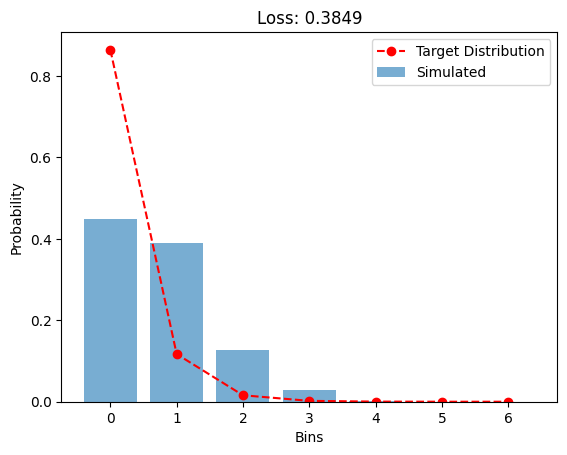

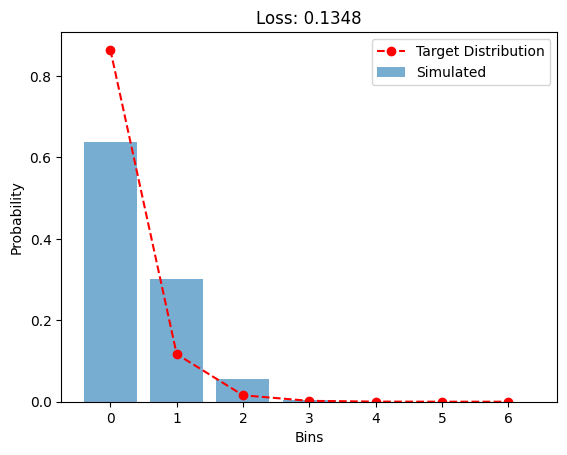

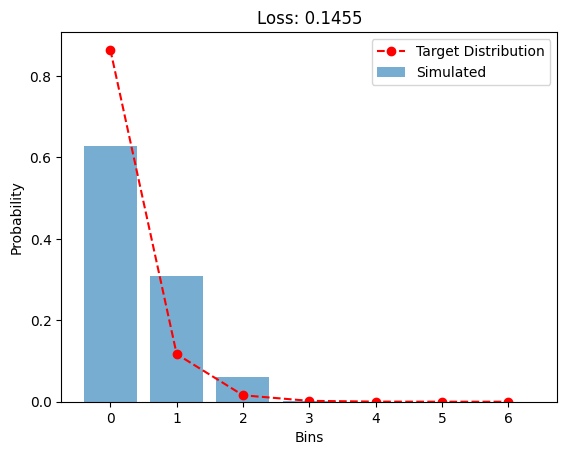

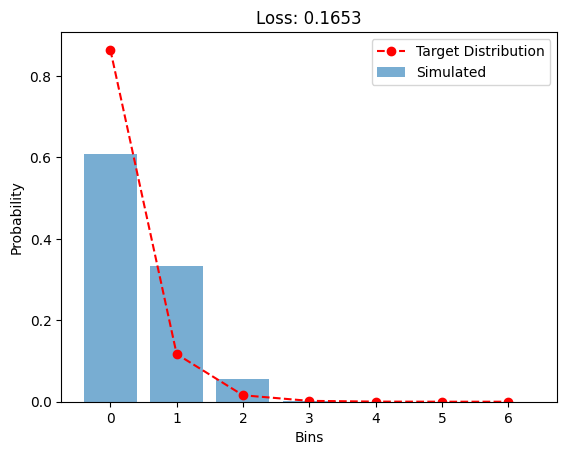

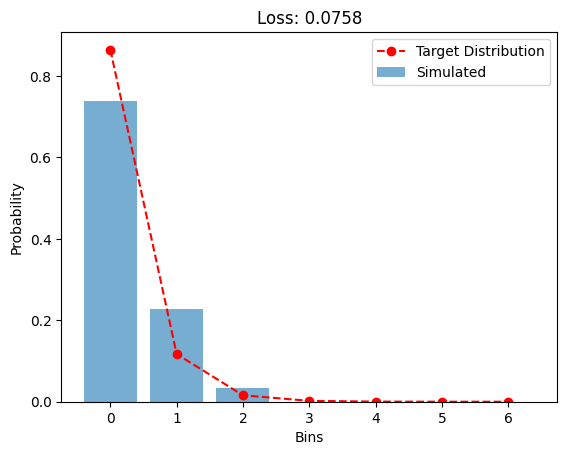

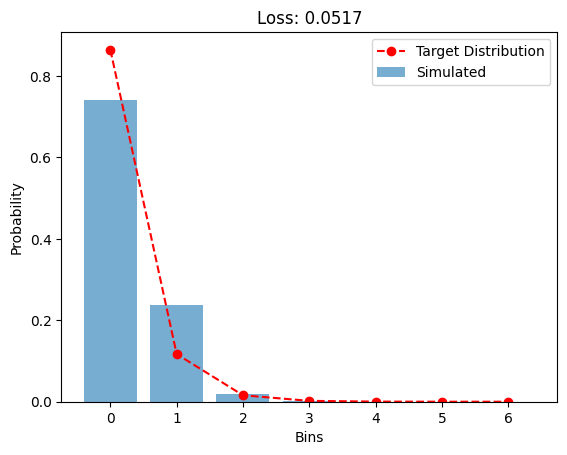

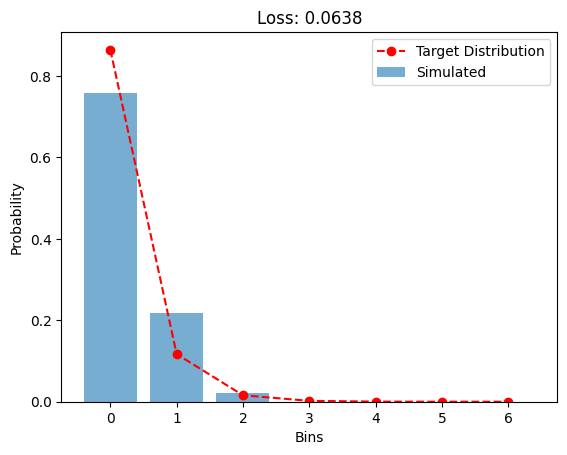

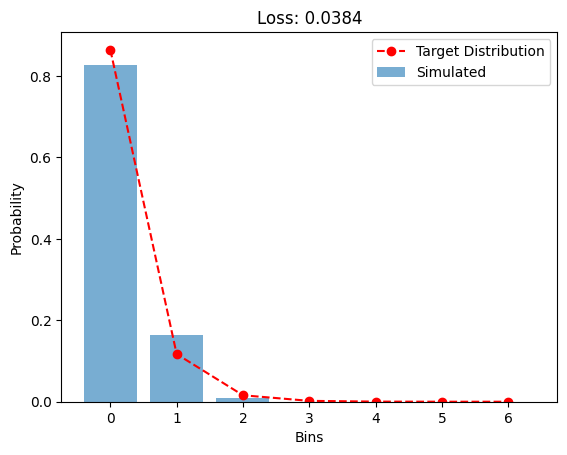

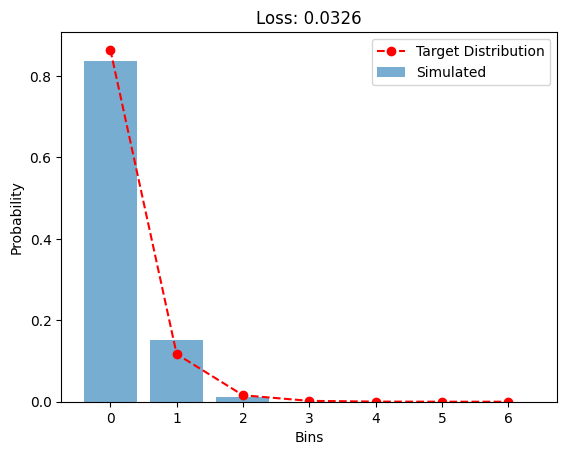

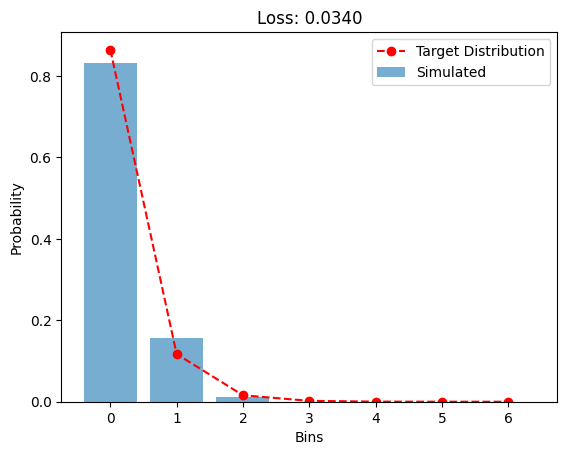

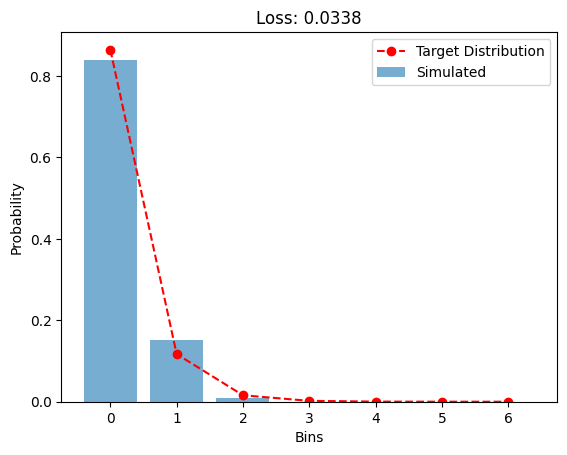

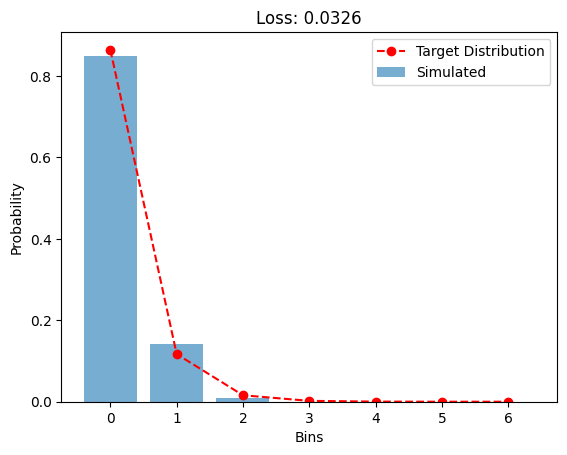

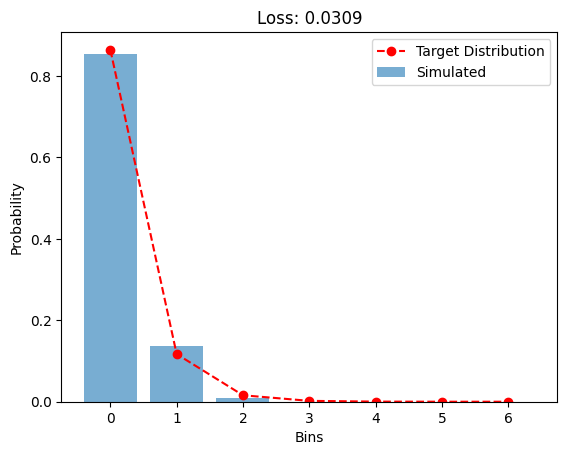


Time limit reached. Forcing optimization to stop.

Optimization stopped due to time limit.

Optimizer exit (last step): N/A
Best tracked [initial, decay]: [0.63350642 2.04954068]
Best Optimized thetas: [0.6335064174365611, 0.3889131018850244, 0.23875590941898836, 0.14657357647812172, 0.08998233121797311, 0.0552406520054424]
Best Loss: 0.03088286219423376


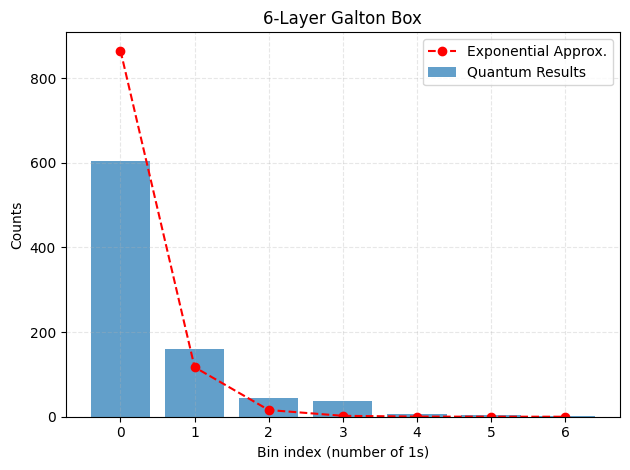

{0: 605, 1: 159, 2: 45, 3: 36, 4: 7, 5: 5, 6: 1}
0.16948240172883983


In [6]:
# Laplace and Exponential Examples

# Exponential:
print("STANDARD SIMULATION:")
res = optimise_layerwise(n=6, target="exponential", scale=0.5, shots=1000) # we aim for beta = 0.5 (or lambda = 2)
counts = biased_galton_n_layer(n=6, shots=1000, thetas=res[0])
plot_bins(counts, n=6, shots=1000, overlay="exponential", scale=0.5)
print(counts)
print(distribution_distance(counts, target_distribution="exponential", lamda=1/0.5, metric="js"))

print("SIMULATED OPTIMISER WITH NOISE MODEL FINAL RESULT:")
res = optimise_layerwise(n=6, target="exponential", scale=0.5, shots=1000) # we aim for beta = 0.5 (or lambda = 2)
counts = biased_galton_n_layer(n=6, shots=1000, thetas=res[0], noise=True)
plot_bins(counts, n=6, shots=1000, overlay="exponential", scale=0.5)
print(counts)
print(distribution_distance(counts, target_distribution="exponential", lamda=1/0.5, metric="js"))

STANDARD SIMULATION:


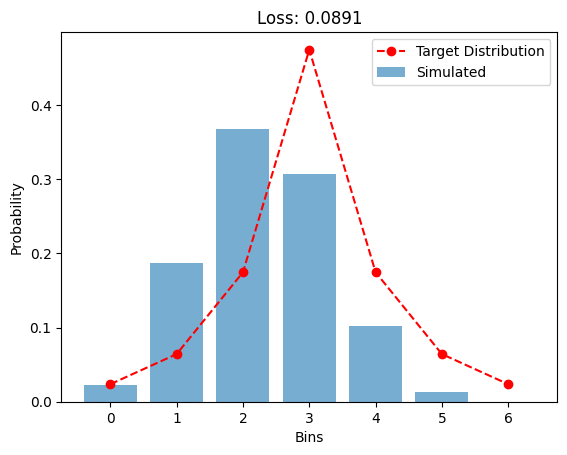

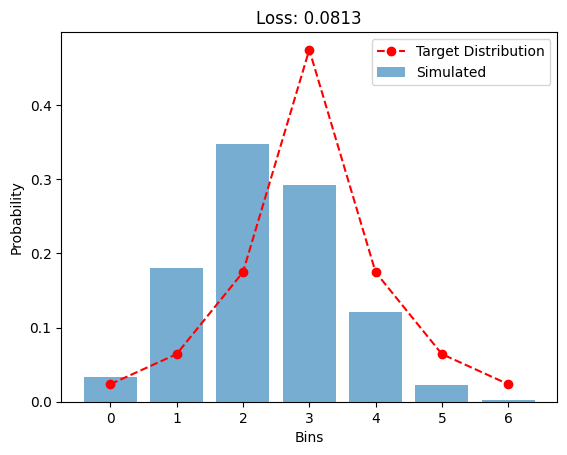

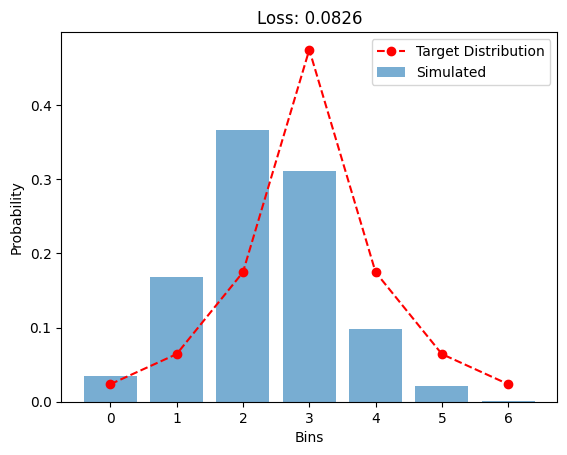

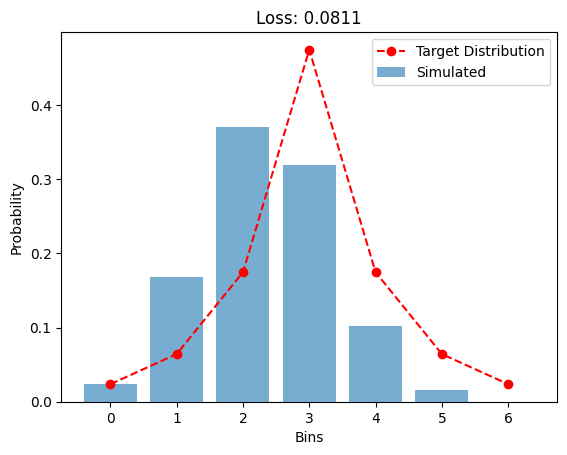

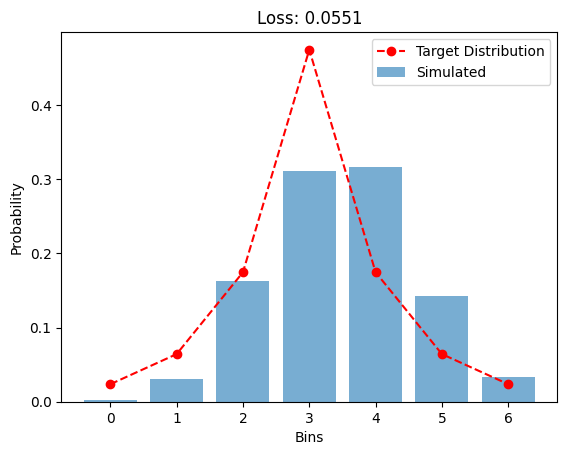

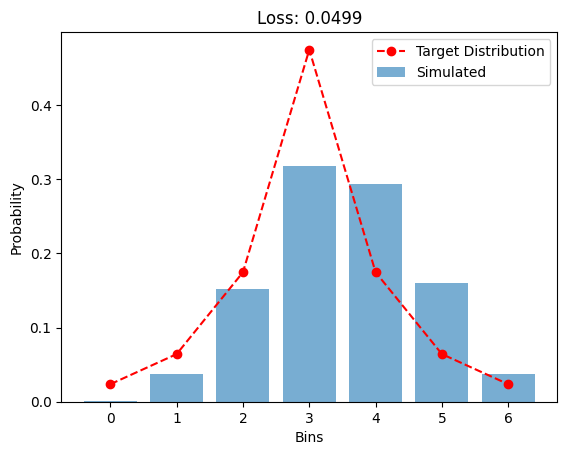

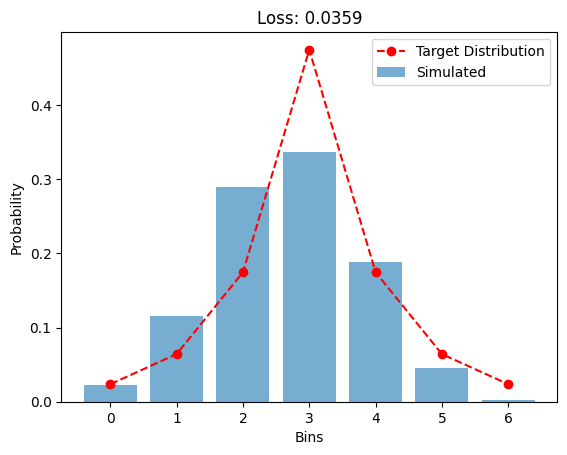

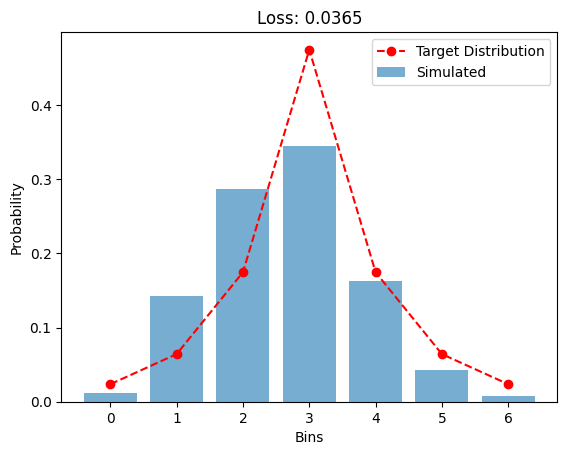

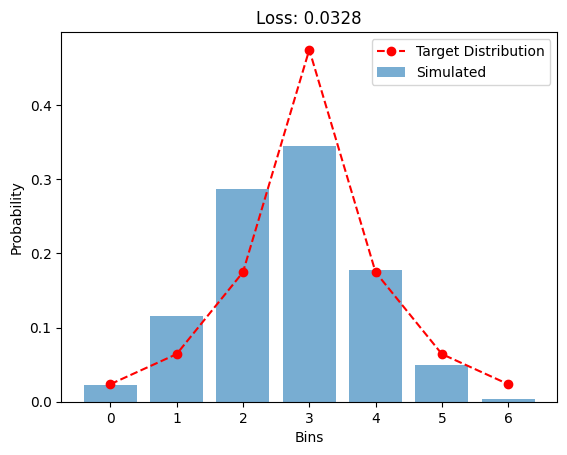


Time limit reached. Forcing optimization to stop.

Optimization stopped due to time limit.

Best Optimized thetas: [2.21085378 1.58336819 1.65241045 1.37318878 1.09396712 0.81474547]
Best Loss: 0.032821609884985704


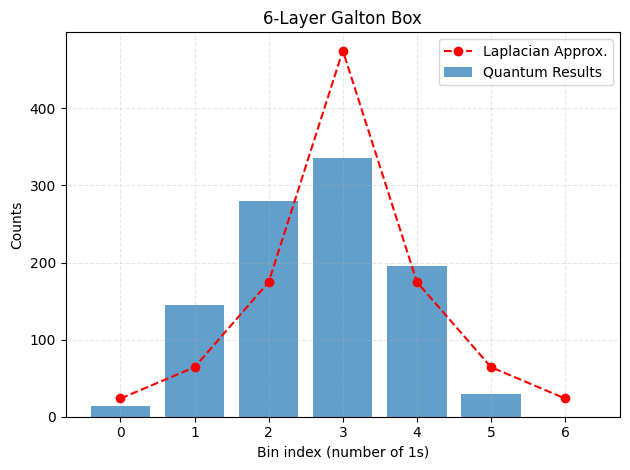

{0: 14, 1: 145, 2: 280, 3: 336, 4: 196, 5: 29, 6: 0}
0.18072545881479535
SIMULATED OPTIMISER WITH NOISE MODEL FINAL RESULT:


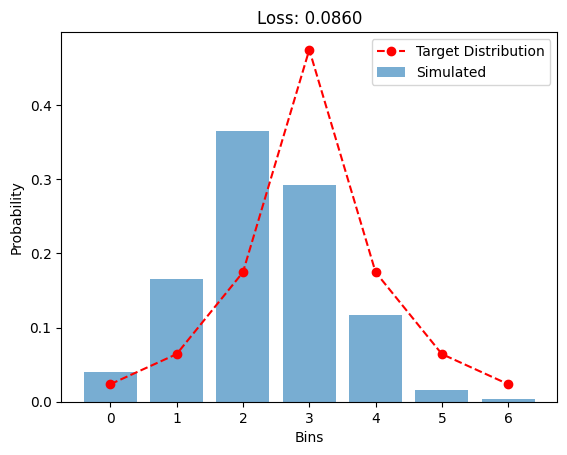

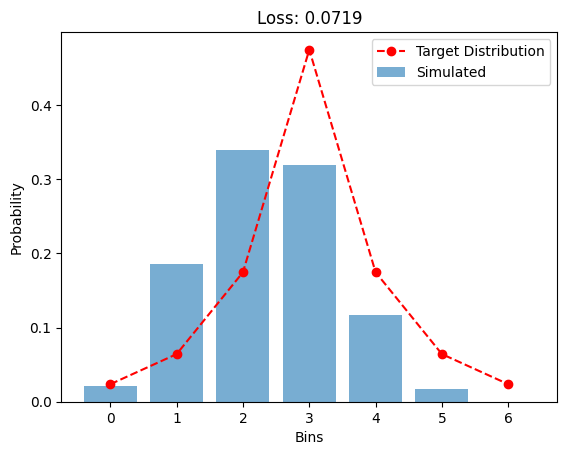

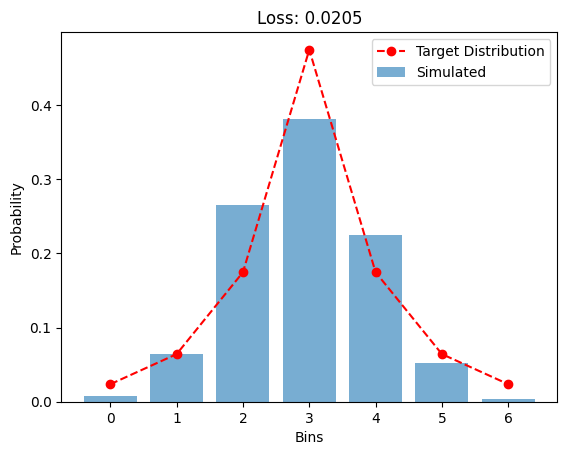

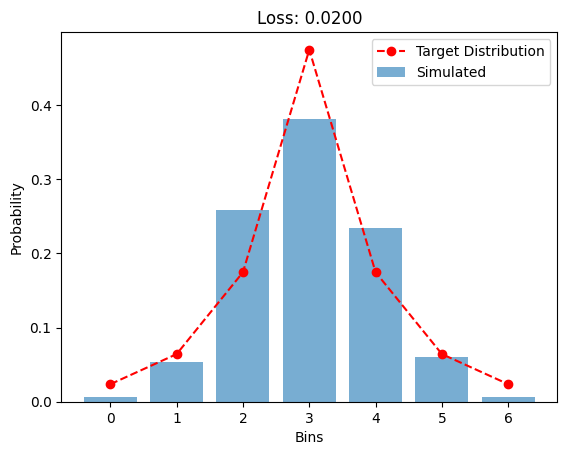

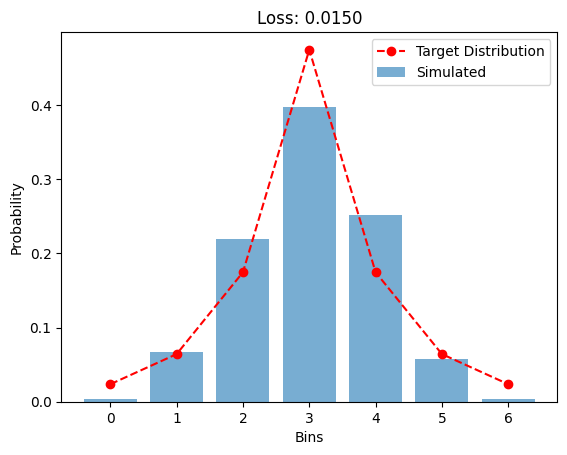


Time limit reached. Forcing optimization to stop.

Optimization stopped due to time limit.

Best Optimized thetas: [2.44787703 2.23976234 0.97457739 0.76646269 1.61541828 1.40730359]
Best Loss: 0.014961955277868004


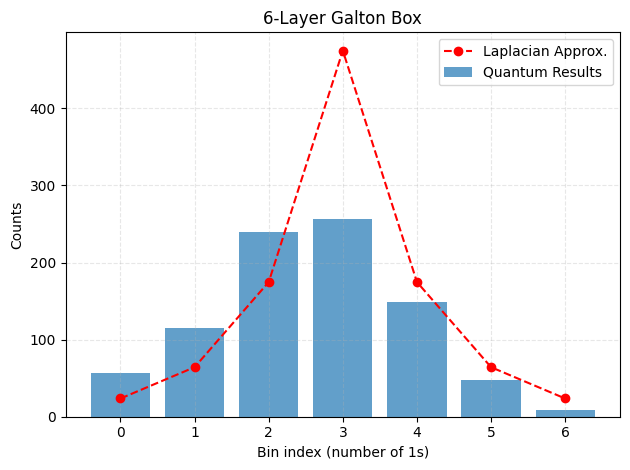

{0: 57, 1: 115, 2: 240, 3: 257, 4: 149, 5: 48, 6: 9}
0.16976255334588417


In [7]:
# Laplace:
print("STANDARD SIMULATION:")
res = optimise_layerwise(n=6, target="laplace", decay=1, shots=1000) 
counts = biased_galton_n_layer(n=6, shots=1000, thetas=res[0])
plot_bins(counts, n=6, shots=1000, overlay="laplace", scale=1)
print(counts)
print(distribution_distance(counts, target_distribution="laplace", mu=6//2, b=1, metric="js"))

print("SIMULATED OPTIMISER WITH NOISE MODEL FINAL RESULT:")
res = optimise_layerwise(n=6, target="laplace", decay=1, shots=1000) 
counts = biased_galton_n_layer(n=6, shots=1000, thetas=res[0], noise=True)
plot_bins(counts, n=6, shots=1000, overlay="laplace", scale=1)
print(counts)
print(distribution_distance(counts, target_distribution="laplace", mu=6//2, b=1, metric="js"))

## Step 4: Accounting for Stochastic Noise Using Multiple Averaged Runs - t-tests

In [8]:
# Gaussian - Small Example
# Perfect Sim:
print("STANDARD SIMULATION")
distance_list = []
for i in range(50):
    counts = galton_n_layer(n=4, shots=1000)
    print(counts)
    distance_list.append(distribution_distance(counts, target_distribution="gaussian", metric="w1", p=0.5))
print(distance_list)
print(significance_test(distance_list, test_type="t", significance_level=0.05, threshold=0.1))
print(f"\n\n\n")

# Averaged noise model:
print("NOISE MODEL")
distance_list = []
for i in range(30):
    counts = galton_n_layer(n=4, shots=1000, noise=True) # with noise model
    print(counts)
    distance_list.append(distribution_distance(counts, target_distribution="gaussian", metric="w1", p=0.5))
print(distance_list)
print(significance_test(distance_list, test_type="t", significance_level=0.05, threshold=0.1))

STANDARD SIMULATION
{0: 74, 1: 242, 2: 409, 3: 206, 4: 69}
{0: 58, 1: 262, 2: 382, 3: 241, 4: 57}
{0: 52, 1: 248, 2: 392, 3: 253, 4: 55}
{0: 51, 1: 239, 2: 383, 3: 262, 4: 65}
{0: 54, 1: 255, 2: 371, 3: 253, 4: 67}
{0: 68, 1: 282, 2: 335, 3: 254, 4: 61}
{0: 72, 1: 217, 2: 394, 3: 263, 4: 54}
{0: 56, 1: 259, 2: 362, 3: 268, 4: 55}
{0: 65, 1: 237, 2: 363, 3: 265, 4: 70}
{0: 55, 1: 245, 2: 366, 3: 265, 4: 69}
{0: 54, 1: 253, 2: 364, 3: 266, 4: 63}
{0: 58, 1: 265, 2: 358, 3: 253, 4: 66}
{0: 57, 1: 244, 2: 398, 3: 241, 4: 60}
{0: 58, 1: 267, 2: 371, 3: 242, 4: 62}
{0: 62, 1: 263, 2: 378, 3: 249, 4: 48}
{0: 66, 1: 277, 2: 350, 3: 244, 4: 63}
{0: 59, 1: 241, 2: 370, 3: 261, 4: 69}
{0: 65, 1: 239, 2: 370, 3: 252, 4: 74}
{0: 59, 1: 258, 2: 359, 3: 258, 4: 66}
{0: 44, 1: 261, 2: 362, 3: 267, 4: 66}
{0: 69, 1: 221, 2: 378, 3: 262, 4: 70}
{0: 63, 1: 262, 2: 381, 3: 236, 4: 58}
{0: 80, 1: 265, 2: 337, 3: 254, 4: 64}
{0: 69, 1: 268, 2: 343, 3: 250, 4: 70}
{0: 57, 1: 246, 2: 342, 3: 278, 4: 77}
{0: 6

## Step 5: Accounting for Stochastic Noise Using Multiple Averaged Runs - Chi-Squared Tests

In [9]:
# Gaussian - Small Example
# Perfect Sim:
print("STANDARD SIMULATION")
distance_list = []
for i in range(50):
    counts = galton_n_layer(n=4, shots=1000)
    print(counts)
    distance_list.append(distribution_distance(counts, target_distribution="gaussian", metric="chi", p=0.5))
print(distance_list)
print(significance_test(distance_list, test_type="chi", significance_level=0.05, n=4))
print(f"\n\n\n")

# Averaged noise model:
print("NOISE MODEL")
distance_list = []
for i in range(30):
    counts = galton_n_layer(n=4, shots=1000, noise=True) # with noise model
    print(counts)
    distance_list.append(distribution_distance(counts, target_distribution="gaussian", metric="chi", p=0.5))
print(distance_list)
print(significance_test(distance_list, test_type="chi", significance_level=0.05, n=4))

STANDARD SIMULATION
{0: 58, 1: 246, 2: 414, 3: 229, 4: 53}
{0: 78, 1: 216, 2: 365, 3: 285, 4: 56}
{0: 64, 1: 243, 2: 383, 3: 255, 4: 55}
{0: 74, 1: 255, 2: 361, 3: 260, 4: 50}
{0: 57, 1: 237, 2: 411, 3: 244, 4: 51}
{0: 68, 1: 253, 2: 362, 3: 251, 4: 66}
{0: 54, 1: 261, 2: 351, 3: 259, 4: 75}
{0: 55, 1: 260, 2: 361, 3: 269, 4: 55}
{0: 60, 1: 253, 2: 357, 3: 252, 4: 78}
{0: 76, 1: 253, 2: 360, 3: 245, 4: 66}
{0: 61, 1: 240, 2: 394, 3: 239, 4: 66}
{0: 77, 1: 247, 2: 375, 3: 239, 4: 62}
{0: 67, 1: 244, 2: 380, 3: 259, 4: 50}
{0: 54, 1: 251, 2: 360, 3: 266, 4: 69}
{0: 69, 1: 220, 2: 377, 3: 259, 4: 75}
{0: 44, 1: 257, 2: 369, 3: 265, 4: 65}
{0: 46, 1: 250, 2: 368, 3: 269, 4: 67}
{0: 64, 1: 256, 2: 386, 3: 228, 4: 66}
{0: 58, 1: 236, 2: 407, 3: 243, 4: 56}
{0: 65, 1: 255, 2: 355, 3: 261, 4: 64}
{0: 70, 1: 242, 2: 380, 3: 250, 4: 58}
{0: 67, 1: 251, 2: 371, 3: 247, 4: 64}
{0: 68, 1: 240, 2: 377, 3: 251, 4: 64}
{0: 61, 1: 228, 2: 399, 3: 250, 4: 62}
{0: 48, 1: 271, 2: 366, 3: 249, 4: 66}
{0: 6